### Pandas
* Series: 類似於一維數組的對象，它由一組數據（各種NumPy數據類型）以及一組與之相關的數據標籤（即索引）組成
* Dataframe : 表格型的數據結構，它含有一組有序的列，每列可以是不同的值類型

In [1]:
import pandas as pd

In [2]:
#from pandas import Series
import pandas as pd

obj = pd.Series([5,10,-10,20])
print(obj)
print(obj.values)
print(obj.index)

0     5
1    10
2   -10
3    20
dtype: int64
[  5  10 -10  20]
RangeIndex(start=0, stop=4, step=1)


In [3]:
#給定索引
obj2 = pd.Series([10, 20, -5, 30], index=['d', 'b', 'a', 'c'])
print(obj2)
print(obj2.index)
print(obj2['a'])
print(obj2[['a','c']])

d    10
b    20
a    -5
c    30
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')
-5
a    -5
c    30
dtype: int64


In [4]:
# Ditctionary 轉化 
sdata = {'Ohio': 15000, 'Texas': 21000, 'Oregon': 16000, 'Utah': 5000}
print(type(sdata))
obj3 = pd.Series(sdata)
print(obj3)

<class 'dict'>
Ohio      15000
Texas     21000
Oregon    16000
Utah       5000
dtype: int64


In [5]:
# List轉化
states = ['California', 'Ohio', 'Oregon', 'Texas']
print(type(states))
obj4 = pd.Series(sdata, index=states)
print(obj4)
print(pd.isnull(obj4))

<class 'list'>
California        NaN
Ohio          15000.0
Oregon        16000.0
Texas         21000.0
dtype: float64
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [6]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          15000.0
Oregon        16000.0
Texas         21000.0
Name: population, dtype: float64

In [7]:
#使用布林遮罩來取值
obj2 = pd.Series([10, 20, -5, 30], index=['d', 'b', 'a', 'c'])
print(obj2[obj2>0])
print(obj2[obj2>0]*2)
obj2[obj2<0] = 0
print(obj2)

# 依照index排序
print(obj2.sort_index())

#依照數值排序
print(obj2.sort_values())

d    10
b    20
c    30
dtype: int64
d    20
b    40
c    60
dtype: int64
d    10
b    20
a     0
c    30
dtype: int64
a     0
b    20
c    30
d    10
dtype: int64
a     0
d    10
b    20
c    30
dtype: int64


In [8]:
# Panda DataFrame 

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [11]:
frame = pd.DataFrame(data,columns=['year','pop','state','debt'],index=['one','two','three','four','five'])
frame
frame.columns
frame['year']
frame.year
frame.loc['two']
#del frame['debt']
frame

,year,pop,state,debt
one,2000,1.5,Ohio,NaN
two,2001,1.7,Ohio,NaN
three,2002,3.6,Ohio,NaN
four,2001,2.4,Nevada,NaN
five,2002,2.9,Nevada,NaN


#### 讀取CSV

In [12]:
import pandas as pd

csv_file = "https://storage.googleapis.com/learn_pd_like_tidyverse/gapminder.csv"
gapminder = pd.read_csv(csv_file)

In [13]:
#顯示型態 - type()

print(type(gapminder))
print(type(gapminder['country']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [14]:
# 顯示前 N 筆資料 - head(N) , 預設N為前五筆
gapminder.head()
#gapminder.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [15]:
# 顯示後 N 筆資料 - tail(N), 預設 N 為 五筆
gapminder.tail()
#gapminder.tail(10)

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [16]:
#顯示欄位- DataFrame.columns()

gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [17]:
#顯示列欄數- DataFrame.shape()
gapminder.shape

(1704, 6)

In [18]:
#顯示列索引資訊- DataFrame.index()
gapminder.index

RangeIndex(start=0, stop=1704, step=1)

In [19]:
#顯示詳細資訊- DataFrame.info()

gapminder.info()
#gapminder.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [20]:
#顯示各變數描述統計資訊- DataFrame.describe()

gapminder.describe()
#gapminder['gdpPercap'].describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [21]:
#顯示特定欄位資料
gapminder[['country']]
#gapminder[['country', 'continent']]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [22]:
#條件查詢,找尋Taiwan資料

gapminder[gapminder['country'] == 'Taiwan']

#gapminder[gapminder['country'] == 'Taiwan'][['country', 'continent','year','pop']]

,country,continent,year,lifeExp,pop,gdpPercap
1500,Taiwan,Asia,1952,58.50,8550362,1206.947913
1501,Taiwan,Asia,1957,62.40,10164215,1507.861290
1502,Taiwan,Asia,1962,65.20,11918938,1822.879028
1503,Taiwan,Asia,1967,67.50,13648692,2643.858681
1504,Taiwan,Asia,1972,69.39,15226039,4062.523897
1505,Taiwan,Asia,1977,70.59,16785196,5596.519826
1506,Taiwan,Asia,1982,72.16,18501390,7426.354774
1507,Taiwan,Asia,1987,73.40,19757799,11054.561750
1508,Taiwan,Asia,1992,74.26,20686918,15215.657900
1509,Taiwan,Asia,1997,75.25,21628605,20206.820980


In [23]:
# 新增欄位

gapminder['country_abb'] = gapminder['country'].apply(lambda x: x[:3])
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,Afg
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,Afg
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,Afg
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,Afg
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,Afg
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,Zim
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,Zim
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,Zim
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,Zim


In [24]:
# 刪除欄位
# dataframe.drop() : axis = 0 表示要刪除觀測值（row），axis = 1 表示要刪除欄位（column）。

gapminder = gapminder.drop(0,axis=0)
#gapminder = gapminder.drop('country_abb',axis=1)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,country_abb
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,Afg
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,Afg
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,Afg
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,Afg
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,Afg
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,Zim
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,Zim
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,Zim
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,Zim


In [25]:
# 資料加總 -- .sum()

gapminder[gapminder['year'] == 2007][['pop']].sum()

pop    6251013179
dtype: int64

In [26]:
# 計算資料平均值-- .mean()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].mean()

lifeExp         67.007423
gdpPercap    11680.071820
dtype: float64

In [27]:
# 計算資料最大值-- .max()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].max()

lifeExp         82.60300
gdpPercap    49357.19017
dtype: float64

In [28]:
# 計算資料最小值-- .min()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].min()

lifeExp       39.613000
gdpPercap    277.551859
dtype: float64

In [29]:
# 計算資料標準差-- .std()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].std()

lifeExp         12.073021
gdpPercap    12859.937337
dtype: float64

In [30]:
# 計算資料中位數-- .median()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].median()

lifeExp        71.935500
gdpPercap    6124.371109
dtype: float64

In [31]:
# 計算資料分位數-- .quantile()
# 計算分位數時，如果資料中有包含 NA，則會自動忽略此筆資料。
# 例如有 10 筆資料，其中一筆為 NA，則計算時只會拿 9 筆資料來計算分位數。

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].quantile()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].quantile(q=[0.25, 0.5, 0.75])

,lifeExp,gdpPercap
0.25,57.16025,1624.842248
0.50,71.93550,6124.371109
0.75,76.41325,18008.835640


In [32]:
# 計算資料眾數-- .mode()

gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap']].mode()

,lifeExp,gdpPercap
0,39.613,277.551859
1,42.082,414.507341
2,42.384,430.070692
3,42.568,469.709298
4,42.592,579.231743
...,...,...
137,81.235,40675.996350
138,81.701,42951.653090
139,81.757,47143.179640
140,82.208,47306.989780


In [33]:
# 計算欄位之間的線性關係強度和方向 -- .corr()
gapminder[gapminder['year'] == 2007][['lifeExp', 'gdpPercap','pop']].corr()

,lifeExp,gdpPercap,pop
lifeExp,1.000000,0.678662,0.047553
gdpPercap,0.678662,1.000000,-0.055676
pop,0.047553,-0.055676,1.000000


<AxesSubplot:xlabel='pop', ylabel='lifeExp'>

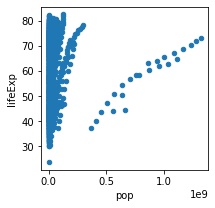

In [34]:
gapminder.plot(x='pop', y='lifeExp', kind='scatter', figsize=(3,3))

In [35]:
# 資料排序 -- sort_values()
gapminder.sort_values(axis=0, by='pop', ascending=False, na_position='first', inplace=True)

In [36]:
display(gapminder.loc[:, ['country','year','pop']].tail(10))

,country,year,pop
1302,Sao Tome and Principe,1982,98593
422,Djibouti,1962,89898
1301,Sao Tome and Principe,1977,86796
1300,Sao Tome and Principe,1972,76595
421,Djibouti,1957,71851
1299,Sao Tome and Principe,1967,70787
1298,Sao Tome and Principe,1962,65345
420,Djibouti,1952,63149
1297,Sao Tome and Principe,1957,61325
1296,Sao Tome and Principe,1952,60011
